In [1]:
import graph
import disease
import pandas as pd
import matplotlib.pyplot as plt 
import pylab as pl
import numpy as np
import collections
%matplotlib inline

/home/students/doorjo01/research/researchEnv/local/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [ ]:
titleLst = ["Dist_Repoductive_Num_20_Percent","Dist_Repoductive_Num_40_Percent","Dist_Repoductive_Num_60_Percent","Dist_Repoductive_Num_80_Percent","Dist_Repoductive_Num_100_Percent"]
for i in range(4):
    trials = 1000
    dist = {}
    connectionLst = []
    basic = False
    for x in range(1,trials):
        if x%50 == 0: print(x)
        g = graph.Graph(8, .1, 0, 200*(i+1))   #k,p,r,%infected,%vaccinated
        g.makeVertices(1000)         #of people
        g.makeConnections(.005)         #prob they are connected
        r = g.calculateR(basic)
    #print(r)
        if r not in dist: #problem with float equality    
            dist[r]=1
        else:
            dist[r] += 1
    distGraph(dist,save =True,filename=titleLst[i],basic = basic)

#for vert in g.getVertices():
#    x =len(vert.getConnections())  
#    connectionLst.append(x)
    
#sum(connectionLst)/250.0

50
100

In [2]:
def makeRanges(d,numColumns):
    res = {}
    keys = d.keys()
    mini = keys[0]
    maxi = keys[len(d)-1]
    diff = maxi - mini
    stepSize = diff/numColumns
    
    currentRange = mini+stepSize
    k = mini
    acc = 0
    for k,v in d.iteritems(): 
        
        
        
        if k < currentRange:
            acc +=v
        else: 
            res["%.3f" %(currentRange)] = acc
            while k > currentRange:
                currentRange += stepSize
                res["%.3f" %(currentRange)] = 0
            acc = v
    print(len(res.keys()))
    return collections.OrderedDict(sorted(res.items()))

def distGraph(dist, save=False,filename="output",basic=False):
    '''
    Given a distribution dictionary, this function graphs the distribution
    Include a save option later
    '''
    numTrials = 20.0
    d = collections.OrderedDict(sorted(dist.items()))
    newD = makeRanges(d,numTrials)
    df = pd.DataFrame.from_dict(newD,orient="index")
    df[1]=df.index
    df[0] = df[0]/numTrials
    ind = np.array(df[1])
    
    plt.suptitle("Distribution of Reproductive Number",fontsize=14)
    print(len(df[0]))
    x_pos = formatGraph(numTrials,df,basic)
    plt.bar(x_pos,df[0])
    
    print("done one")
    if save:
        #fig = pyplot.get_figure()
        #fig = plt.figure()
        plt.savefig('graphDir/'+filename+'.pdf')
        plt.clf()
        
        
def formatGraph(numTrials,df,basic):
    if basic: subTitle="Basic "
    else: subTitle=""

    plt.suptitle("Distribution of %sReproductive Number" %(subTitle), fontsize=14)
    x_pos = np.arange(len(df[0]))
    lst1,lst2 = getTicks(numTrials,df)
    plt.xticks(lst1,lst2,horizontalalignment="left")
    plt.ylabel('Frequency')
    plt.xlabel('R')
    
    return x_pos
def getTicks(numTrials,df):
    pos = []
    ticks =[]
    for i in range(len(df)):
        if (i+1)%5 == 0:
            pos.append(i)
            ticks.append(df[1].iloc[i])
    return pos, ticks
        

done one


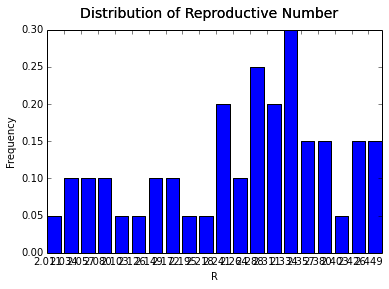

In [50]:


distGraph(dist,save=True)

In [39]:
frame = pd.DataFrame.from_dict(dist,orient="index")



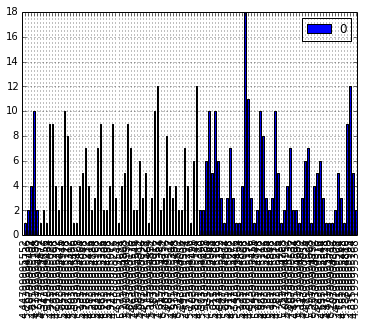

In [28]:
frame.plot(kind="bar")

In [36]:
frame= frame.sort_index()

In [37]:
frame.head()

,0
4.448,1
4.456,2
4.472,1
4.496,2
4.504,1


In [38]:
frame.tail()

,0
5.440,1
5.472,1
5.504,1
5.528,1
5.544,1


In [65]:
import collections

d = collections.OrderedDict(sorted(dist.items()))
#print(d)
def makeRanges(d):
    res = {}
    keys = d.keys()
    mini = keys[0]
    print(mini)
    maxi = keys[len(d)-1]
    diff = maxi - mini
    stepSize = diff/20
    currentRange = mini+stepSize
    k = mini
    acc = 0
    print(currentRange)
    for k,v in d.iteritems():
        
        if k < currentRange:
            acc +=v
        else:
            
            res[currentRange] = acc
            currentRange += stepSize
            acc =0
    return collections.OrderedDict(sorted(res.items()))
    '''as you go through the ordered dict, set the first range tostop at the minimim plus the step size.  
    while the key is less than the current range, accumlate the values. 
    once the key is greater than the currrent range, increment the range by a step size and start over. '''
newD=makeRanges(d)



4.44799995552
4.50279995497


In [23]:
df = pd.DataFrame.from_dict(dist, orient="index")
df

,0
2.335084,1
2.152834,1
2.420514,2
2.329389,4
2.238264,2
2.147139,1
2.414819,1
2.323694,1
2.317998,1
2.226873,2


In [30]:
np.array(dist.keys())

array([ 2.33508444,  2.15283395,  2.42051436,  2.32938911,  2.23826386,
        2.14713862,  2.41481903,  2.32369378,  2.31799846,  2.22687321,
        2.04462272,  2.13005263,  2.3066078 ,  2.03323206,  2.39203772,
        2.30091247,  2.448991  ,  2.02753673,  2.29521714,  2.2040919 ,
        2.10727132,  2.28382649,  2.19270124,  2.36925641,  2.27813116,
        2.05601337,  2.36356108,  2.27243583,  1.98766944,  2.35786575,
        2.2667405 ,  2.08449001,  2.44329567,  2.35217042,  2.07879468,
        2.43760034,  2.34647509,  2.25534985,  2.07309936,  2.24965452,
        2.15852927,  2.42620969])